# Семинар 6 - Введение в простые модели ML

Дополнительно понадобятся следующие библиотеки. Раскомментируйте код, чтобы установить их.

In [1]:
# !pip install -U scikit-learn
# !pip install pandas

# Метрики

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')
plt.style.use('seaborn')

%matplotlib inline

Зададим истинные и "предсказанные" метки для того, чтобы посмотреть на точность предсказаний.

In [3]:
y_pred = [0, 1, 1, 0, 0, 1, 0, 3]
y_true = [0, 1, 2, 0, 1, 2, 3, 4]

## Accuracy

In [4]:
accuracy_score(y_true, y_pred)

0.375

## Precision

In [5]:
precision_score(y_true, y_pred, average=None)

array([0.5       , 0.33333333, 0.        , 0.        , 0.        ])

## Recall

In [6]:
recall_score(y_true, y_pred, average=None)

array([1. , 0.5, 0. , 0. , 0. ])

## F1_score

In [7]:
f1_score(y_true, y_pred, average=None)

array([0.66666667, 0.4       , 0.        , 0.        , 0.        ])

# KNN

## Загрузим данные

In [8]:
data = load_digits()
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

1


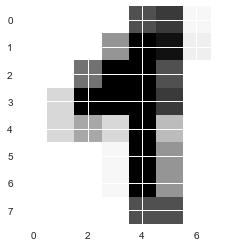

In [9]:
img = data.data[56].reshape(8, 8)
print(data.target[56])

plt.imshow(img)
plt.show()

In [10]:
X, y = data.data, data.target

In [11]:
print('В датасете {} объектов и {} признака'.format(X.shape[0], X.shape[1]))

В датасете 1797 объектов и 64 признака


### Посмотрим на объекты:

Class name: 5
[[ 0.  0. 15. 13. 13. 13.  0.  0.]
 [ 0.  0. 16. 16. 11.  3.  0.  0.]
 [ 0.  0. 12. 13.  0.  0.  0.  0.]
 [ 0.  0.  5. 16.  3.  0.  0.  0.]
 [ 0.  0.  0. 11. 10.  0.  0.  0.]
 [ 0.  0.  0. 10. 14.  0.  0.  0.]
 [ 0.  0.  9. 16. 10.  0.  0.  0.]
 [ 0.  0. 11. 15.  1.  0.  0.  0.]]


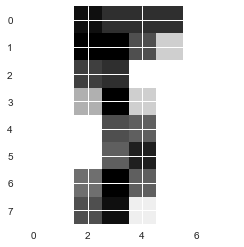

In [12]:
i = np.random.randint(0, X.shape[0])
print('Class name: {}'.format(y[i]))
print(X[i].reshape(8,8))

X[i]
plt.imshow(X[i].reshape(8,8), cmap='gray_r')
plt.show()

Посмотрим на баланс классов:

In [13]:
counts = np.unique(y, return_counts=True)

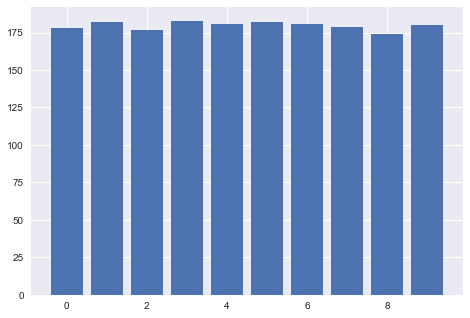

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts[0], counts[1])
plt.show()

Разделим выборку на две части: обучающую и тестовую

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5, 
                                                    shuffle=True,
                                                   random_state=18)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((898, 64), (899, 64), (898,), (899,))

## Метод ближайших соседей

Зададим классификатор:

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train, y_train)
knn_predictons = knn.predict(X_test)

In [18]:
preds = pd.DataFrame(y_test, columns=['True'])
preds['knn_pred'] = knn_predictons

In [19]:
preds.head(200).T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
True,0,3,4,4,8,4,0,8,3,7,...,9,7,6,7,8,6,9,6,2,3
knn_pred,0,3,4,4,8,4,0,8,3,7,...,9,7,6,7,8,6,9,6,2,3


Посмотрим долю правильных ответов:

In [20]:
accuracy_score(y_test, knn_predictons)

0.9866518353726362

## Поиск оптимальных параметров

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
n = np.linspace(1, 21, 21, dtype=int)

In [23]:
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [24]:
kNN_cv = KNeighborsClassifier(n_neighbors=5)
params = {
    'metric':['minkowski', 'manhattan'],
    'n_neighbors': n,
         }

gcv = GridSearchCV(kNN_cv, param_grid=params, cv=5, scoring='accuracy')
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])},
             scoring='accuracy')

In [25]:
gcv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'metric': ['minkowski', 'manhattan'],
  'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [26]:
def print_cv_results(a, len_gs, params, param_r, param_sep): 
    d = len(params['param_grid'][param_sep])
    ar = np.array(a).reshape(d, len_gs).T
    df = pd.DataFrame(ar)

    pen_par = params['param_grid'][param_sep]
    c_par = params['param_grid'][param_r]
    if type(c_par) != list: 
        c_par = c_par.tolist()
        
    columns_mapper = dict(zip(range(0, len(pen_par)), pen_par))
    row_mapper = dict(zip(range(0, len(c_par)), c_par))

    df.rename(columns=columns_mapper, index=row_mapper, inplace=True)

    plot = df.plot(title='Mean accuracy rating', grid=True)
    plot.set_xlabel(param_r, fontsize=13)
    plot.set_ylabel('acc', rotation=0, fontsize=13, labelpad=15)
    
    plt.show()

In [27]:
gcv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'metric': ['minkowski', 'manhattan'],
  'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

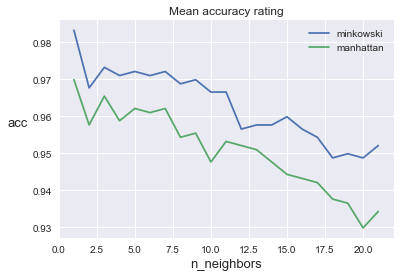

{'metric': 'minkowski', 'n_neighbors': 1}

In [28]:
print_cv_results(gcv.cv_results_['mean_test_score'],
                 21, gcv.get_params(), 'n_neighbors','metric')
gcv.best_params_

In [29]:
print('Лучший скор %.4f' % gcv.best_score_)
print('при метрике %(metric)s и %(n_neighbors)s соседей' % gcv.best_params_)

Лучший скор 0.9833
при метрике minkowski и 1 соседей


### Что получится на тесте?

In [30]:
accuracy_score(y_test, gcv.predict(X_test))

0.985539488320356

In [31]:
gcv_preds = pd.DataFrame(gcv.predict(X_test), columns=['kNN'])

In [32]:
gcv_preds['True'] = y_test

In [33]:
gcv_preds

,kNN,True
0,0,0
1,3,3
2,4,4
3,4,4
4,8,8
...,...,...
894,0,0
895,1,1
896,8,8
897,0,0


Посмотрим на те цифры, которые "путает" наш классификатор

In [34]:
gcv_preds[gcv_preds['True'] != gcv_preds['kNN']]

,kNN,True
78,1,8
107,5,1
252,4,9
308,9,3
324,1,8
477,8,6
572,8,9
579,4,0
611,1,6
651,1,8


# Линейные модели

## Постановка задачи

![picture](https://drive.google.com/uc?export=view&id=1pNRo9-N2Udjv3AK0uTJ0qCWkk9Ko_9TA)

Где линейная модель - это: $$ \hat{y} = f(x) = \theta_0*1 + \theta_1*x_1 + ... + \theta_n*x_n = \theta^T*X$$

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [35]:
def lin_function(x):
    return 4 * x + 5

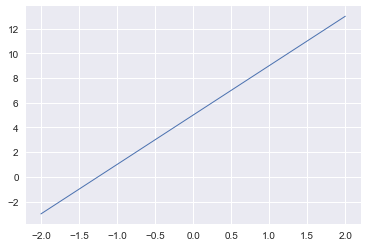

In [36]:
x_true = np.array([-2, 2])
y_true = lin_function(x_true)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [37]:
n = 100
x = np.random.rand(n, 1) * 4 - 2
e = np.random.rand(n, 1) * 4 - 2
y = lin_function(x) + e

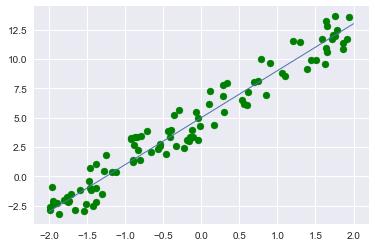

In [38]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Метрики

Mean Absoulte Error:
$$MAE = \frac1N \sum_{i = 1}^N|f(x_i) - y_i| = \frac1N \sum_{i = 1}^N|\hat y_i - y_i| = \frac1N || \hat Y - Y||_1$$

Mean Sqared Error:
$$MSE = \frac1N \sum_{i = 1}^N(f(x_i) - y_i)^2 = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N ||\hat Y - Y||_2$$


## Аналитический метод поиска минимума по MSE

$$MSE -> min $$

$$MSE = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N \sum_{i = 1}^N(\theta_i * x_i - y_i)^2 = \frac1N ||X \theta - Y||_2 = \frac1N (X\theta - Y)^T*(X\theta - Y) $$



$$ \frac{d}{d\theta}[\frac1N (X\theta - Y)^T*(X\theta - Y)] =  \frac1N \frac{d}{d\theta}[Y^TY - 2Y^TX\theta+\theta^TX^TX\theta]  $$

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [39]:
x_matrix = np.hstack([np.ones((n, 1)), x])

In [40]:
%%time

# найдем аналитическое решение
thetha_matrix = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)

CPU times: user 100 µs, sys: 38 µs, total: 138 µs
Wall time: 105 µs


Обратите внимание на время работы

In [41]:
thetha_matrix.T[0].tolist()

[5.014446816024188, 3.907939015920057]

In [42]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 5.014447
Коэфициент: 3.907939


In [43]:
%%time
lr = LinearRegression()
lr.fit(x,y);

CPU times: user 1.15 ms, sys: 236 µs, total: 1.38 ms
Wall time: 765 µs


LinearRegression()

In [44]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 5.014447
Коэфициент: 3.907939


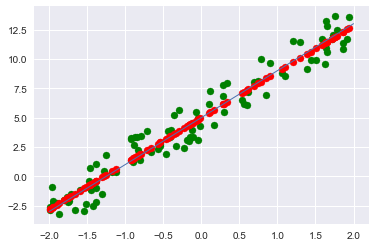

In [45]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Градиентный спуск

$$\theta^{(t+1)} = \theta^{(t)} - lr\cdot \nabla MSE(\theta^{(t)}),$$
где $lr$ — длина шага градиентного спуска (learning rate).

$$\nabla MSE(\theta)= \frac{2}{N} X^T \cdot \bigl(X \cdot \theta - Y \bigr) $$

In [46]:
def animate_solutions(iter_solutions):

    fig, ax = plt.subplots(figsize=(6.4 * 1, 4.8 * 1))

    def update(idx):
        _theta = iter_solutions[idx]
        
        ax.clear()       
        
        ax.scatter(x, y, color='g', label='Выборка')
        ax.plot(x_true, y_true, linewidth=1, label='Исходная зависимость')
        ax.plot(x_true, x_true * _theta[1] + _theta[0], linewidth=1, color='r', label='Предсказанная зависимость')
        
        ax.legend(loc='upper left', fontsize=13)

    fps = 3
    ani = animation.FuncAnimation(fig, update, len(iter_solutions), interval=100 / fps)
    
    return ani

In [47]:
%%time
lr = 0.1  # шаг обучения
n_iterations = 150  # количество итераций

theta = np.random.randn(2,1)  # начальная инициализация
iter_solutions = [theta]

for iteration in range(n_iterations):       
    gradients = 2 / n * x_matrix.T @ (x_matrix @ theta - y) 
    theta = theta - lr * gradients
    
    iter_solutions.append(theta)

CPU times: user 1.35 ms, sys: 640 µs, total: 1.99 ms
Wall time: 1.23 ms


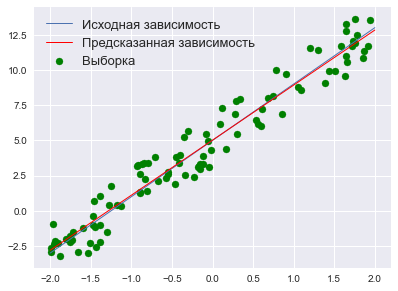

In [48]:
# изобразим результаты численного решения

plt.figure(figsize=(6.4 * 1, 4.8 * 1))

plt.scatter(x, y, color='g', label='Выборка')
plt.plot(x_true, y_true, linewidth=1, label='Исходная зависимость')
plt.plot(x_true, x_true * theta[1] + theta[0], linewidth=1, color='r', label='Предсказанная зависимость')

plt.legend(loc='upper left', fontsize=13)
plt.show()

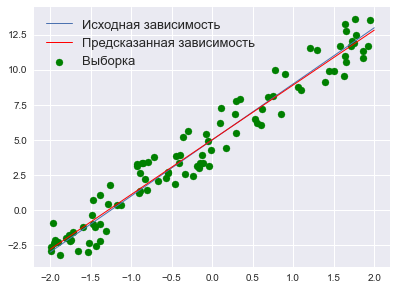

In [49]:
ani = animate_solutions(iter_solutions)
HTML(ani.to_html5_video())